In [1]:
import pandas as pd
from venn import venn
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [3]:
cmap = matplotlib.cm.get_cmap('Set1')
methods = ['limma', 'T-test', 'dmpFinder', 'dmpFinder, vs']

C:\Users\Lenovo\anaconda3\lib\site-packages\venn\_venn.py:83: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = subplots(nrows=1, ncols=1, figsize=figsize)


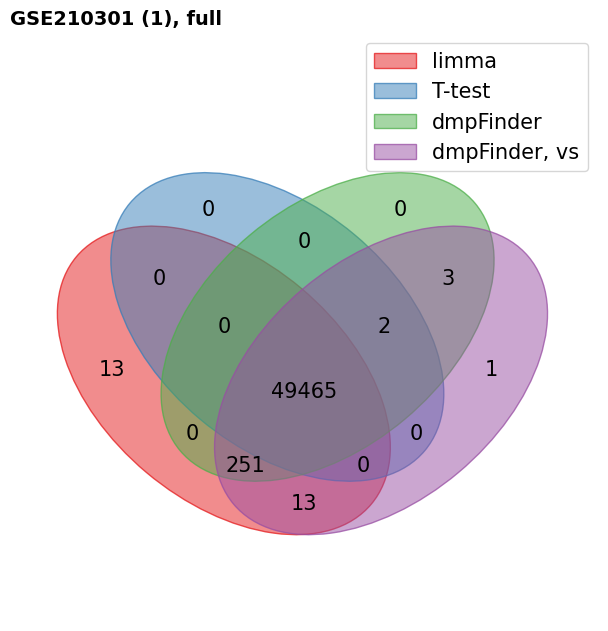

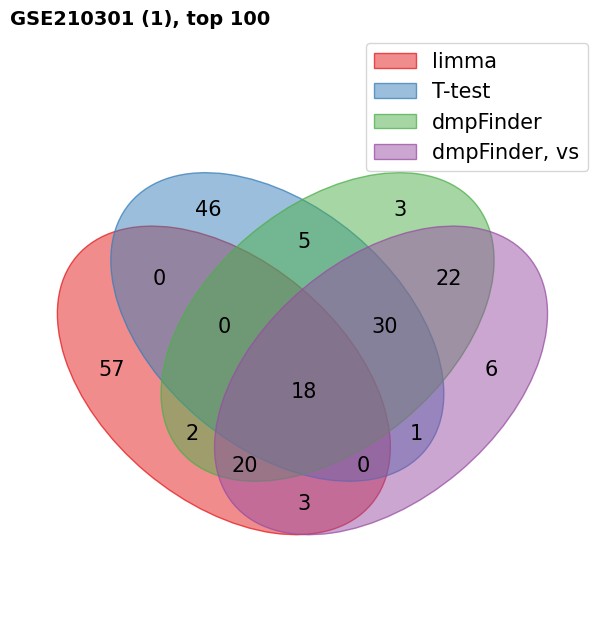

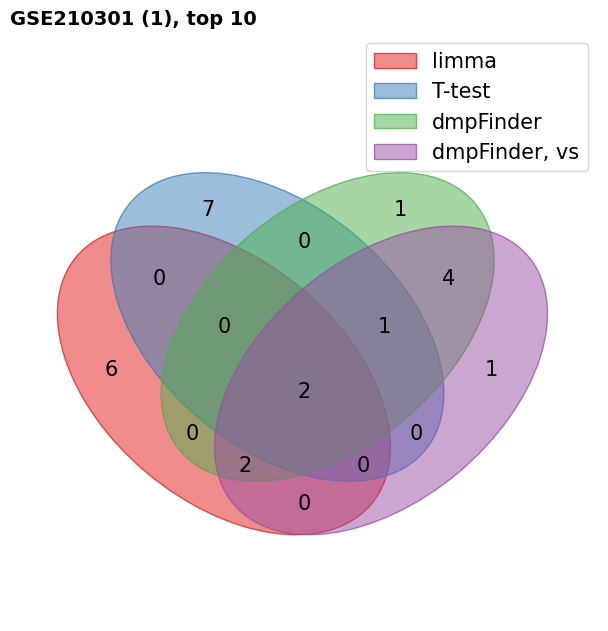

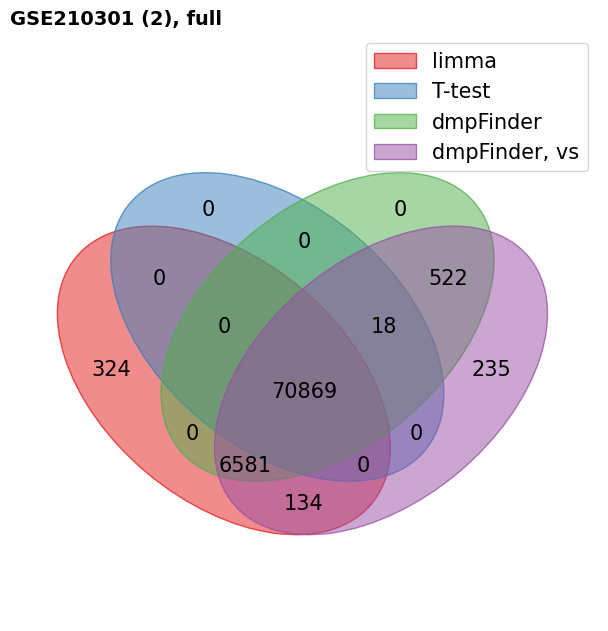

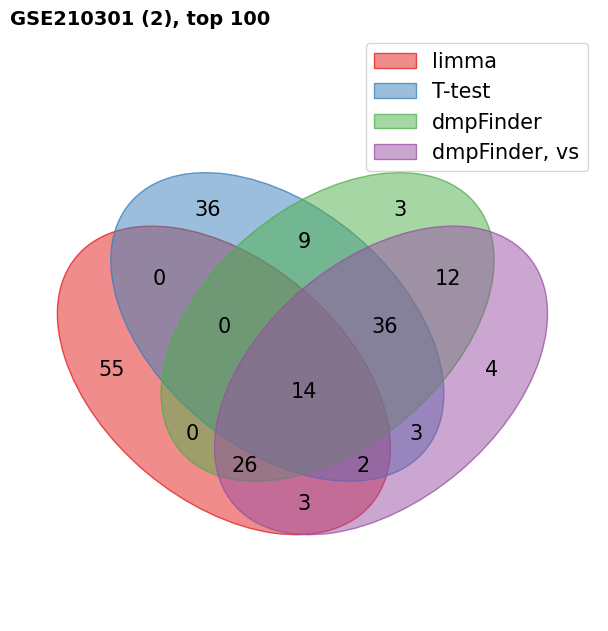

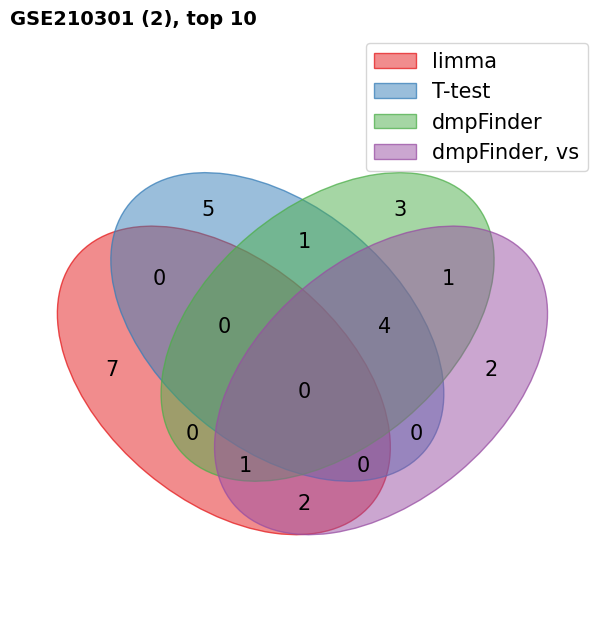

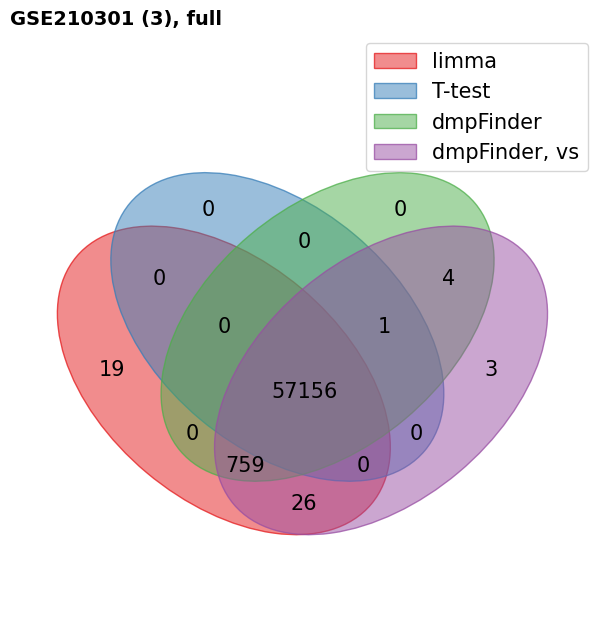

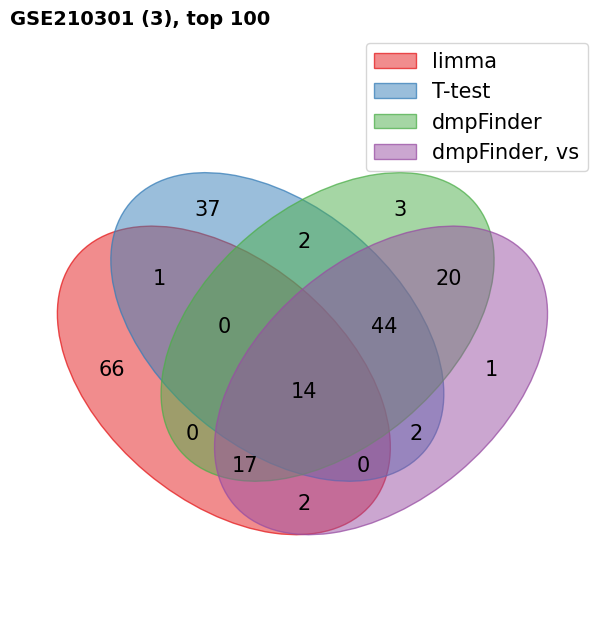

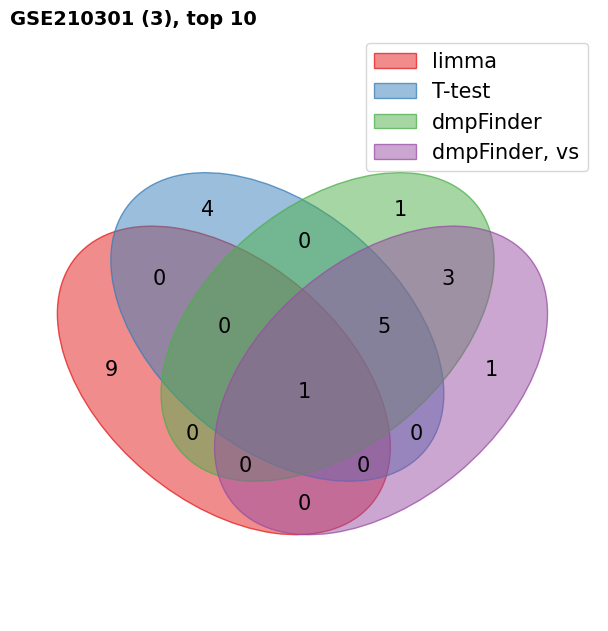

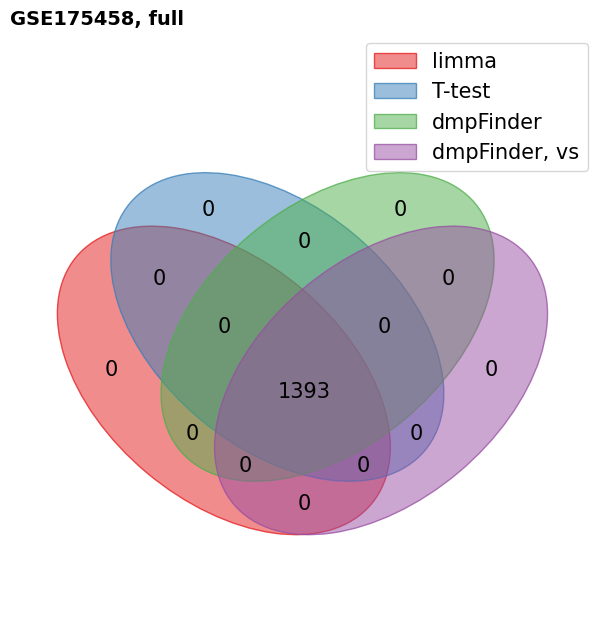

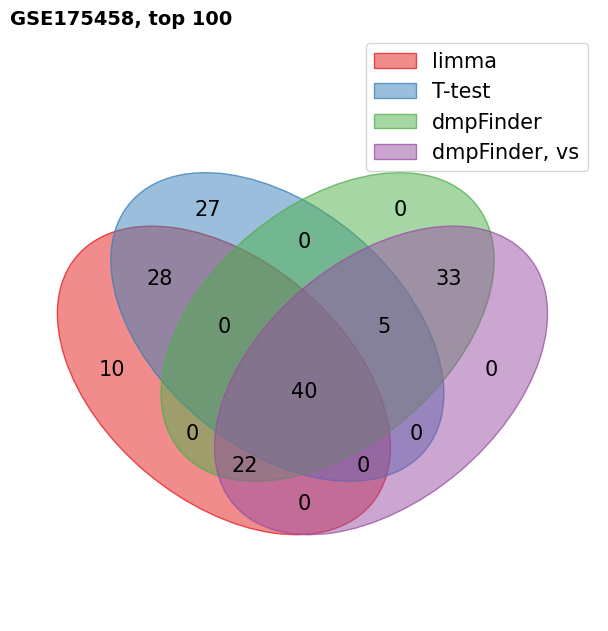

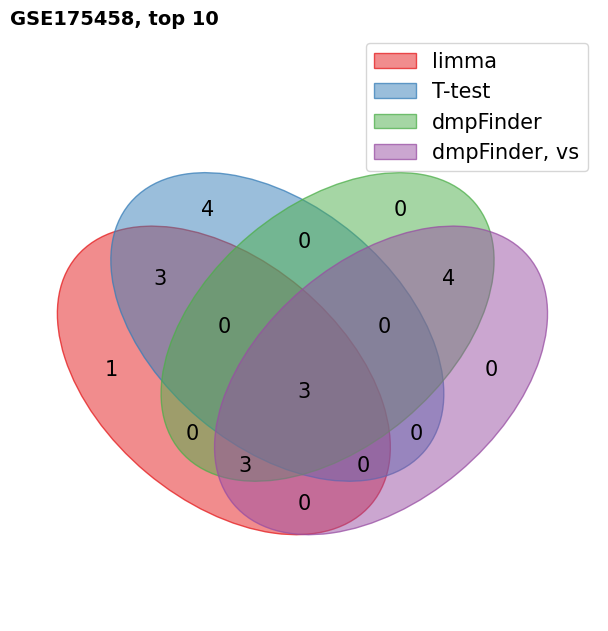

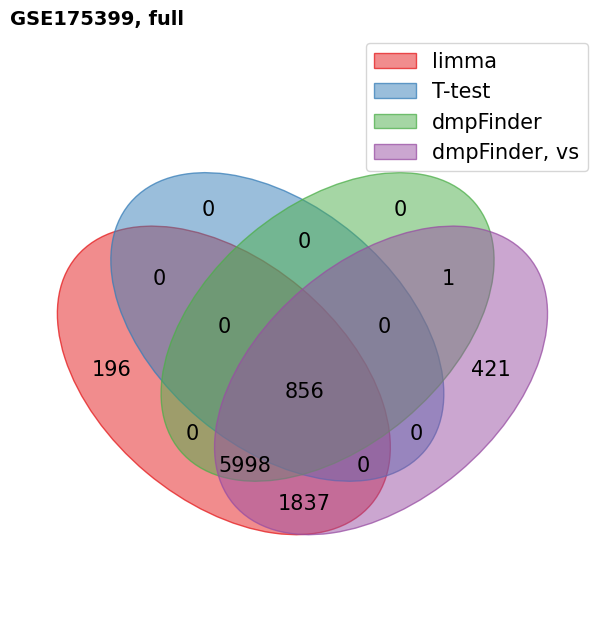

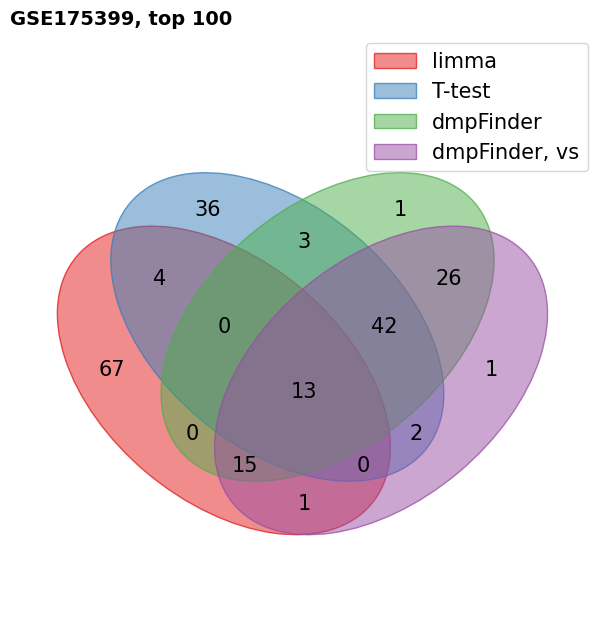

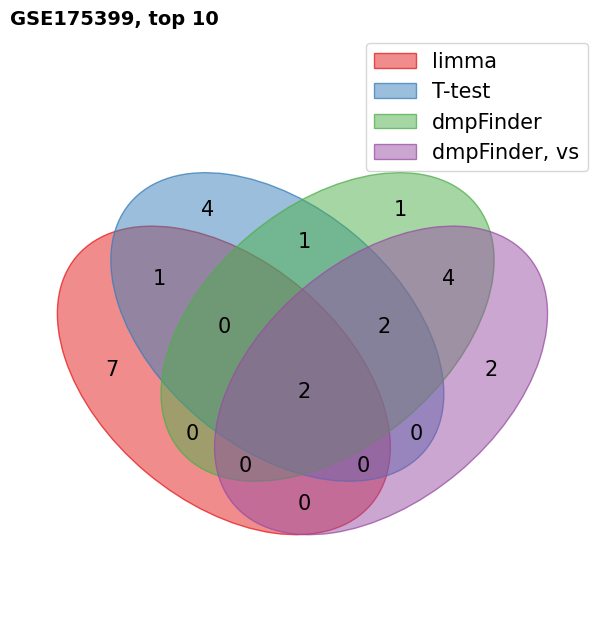

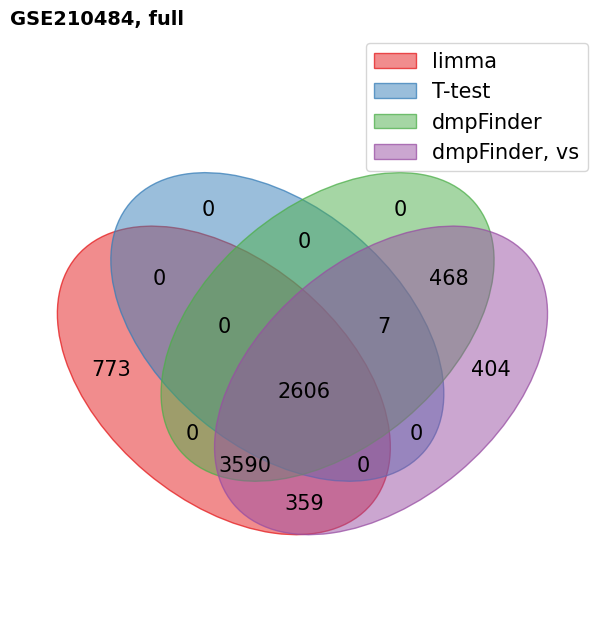

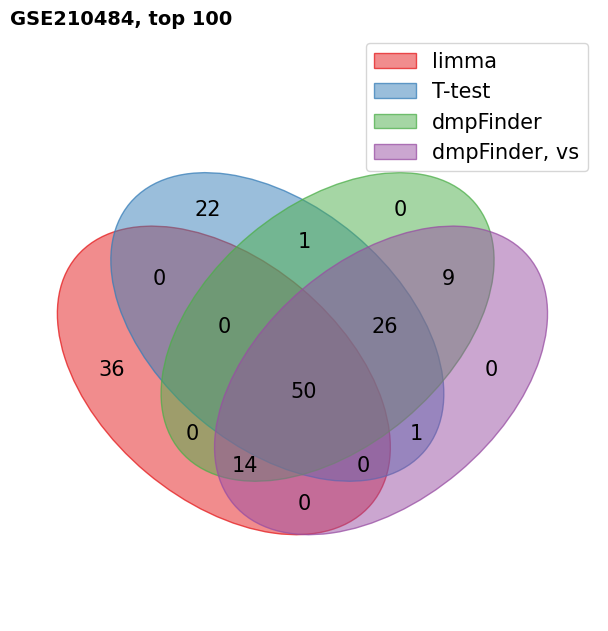

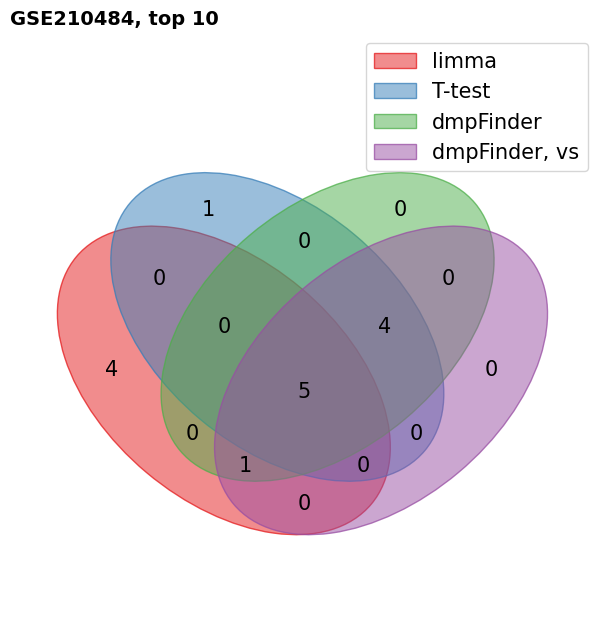

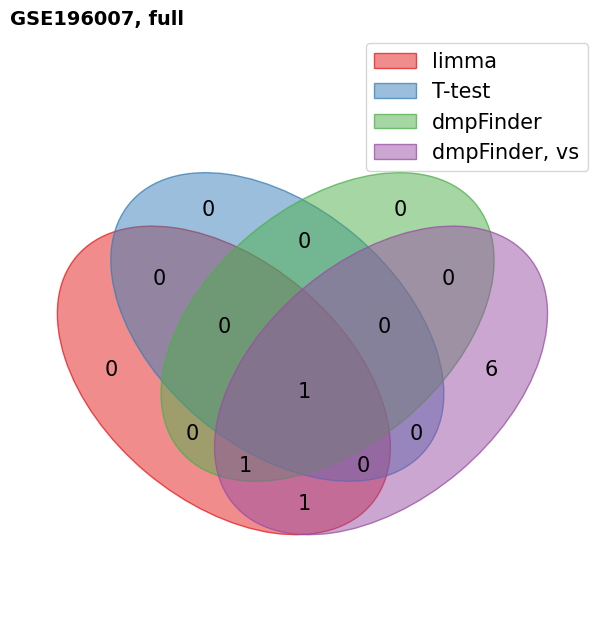

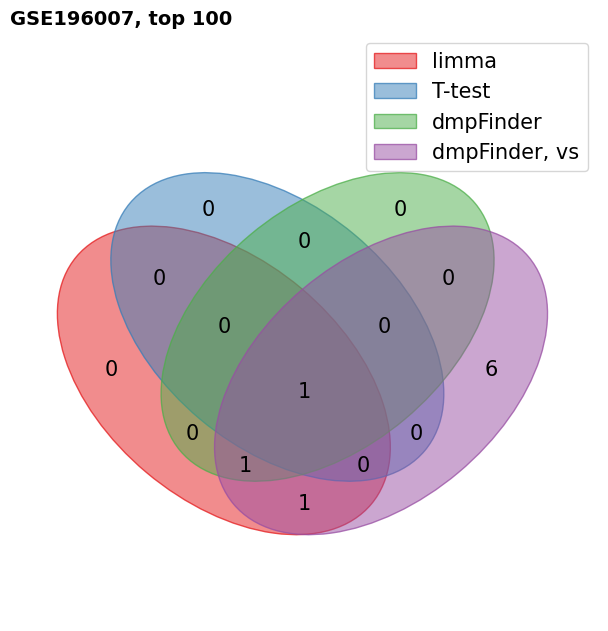

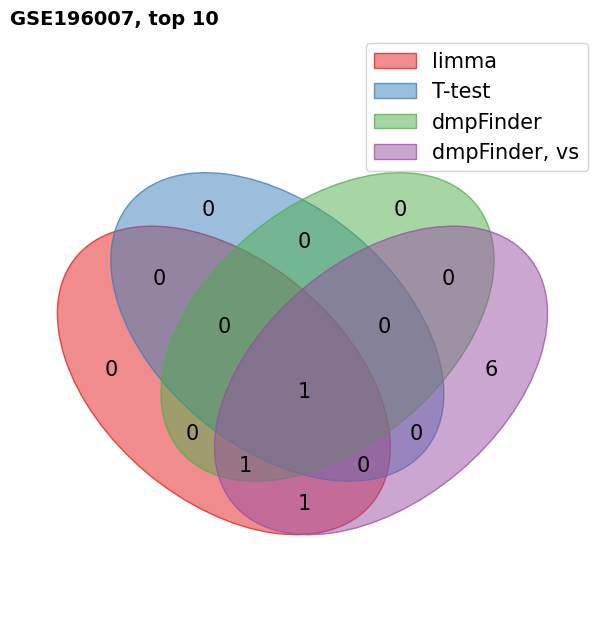

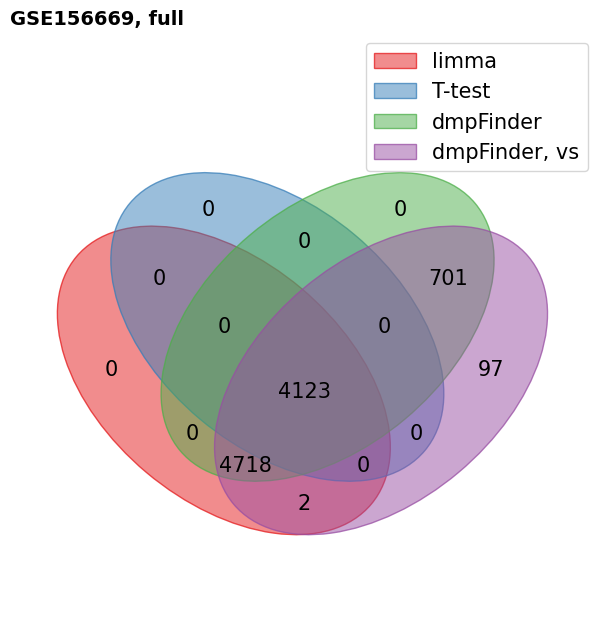

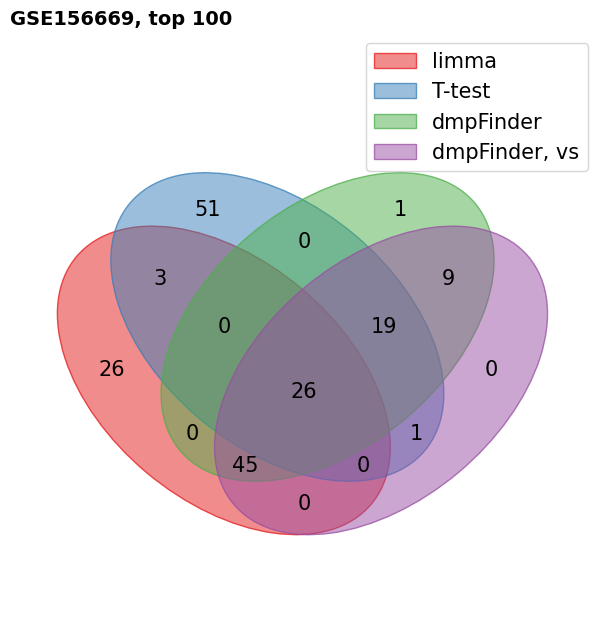

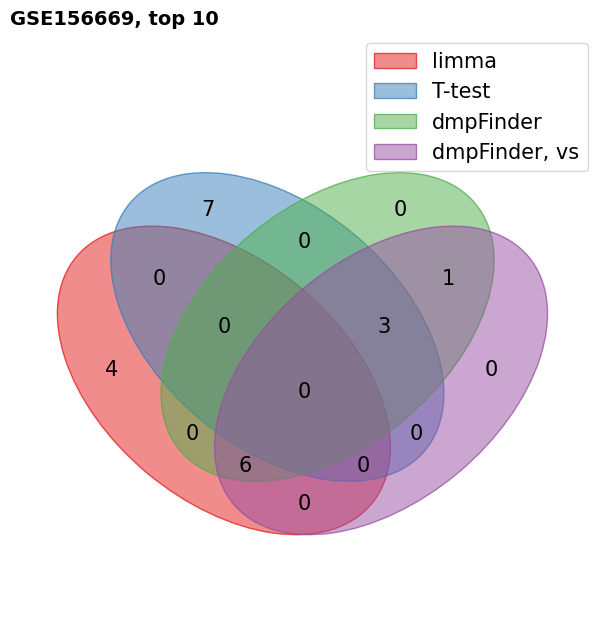

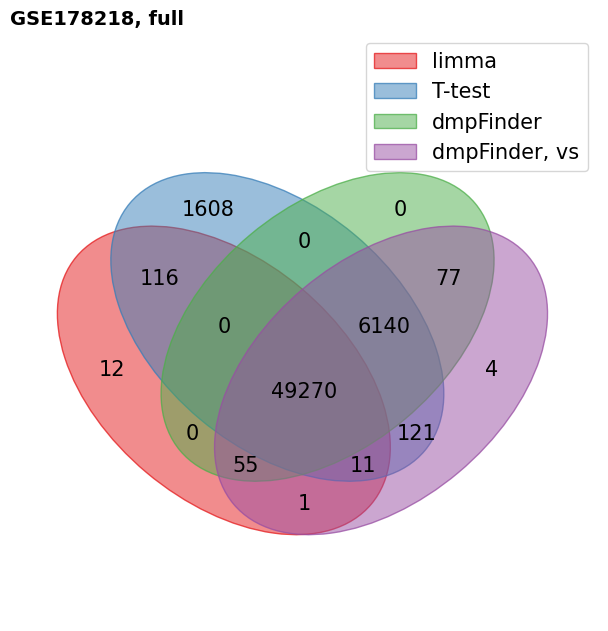

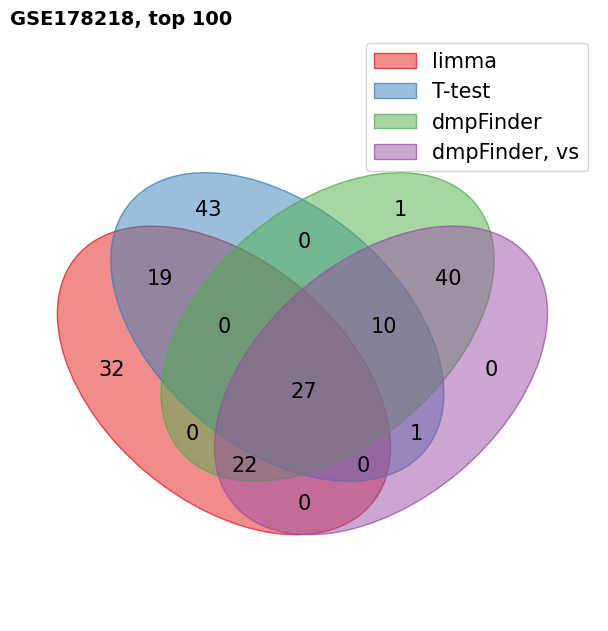

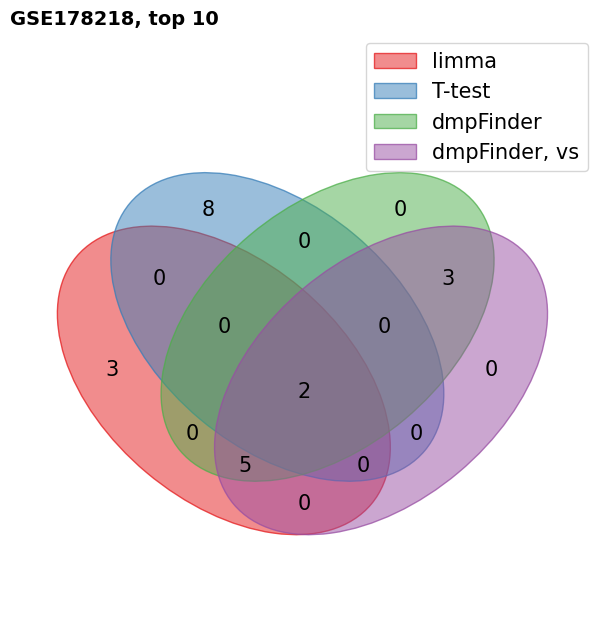

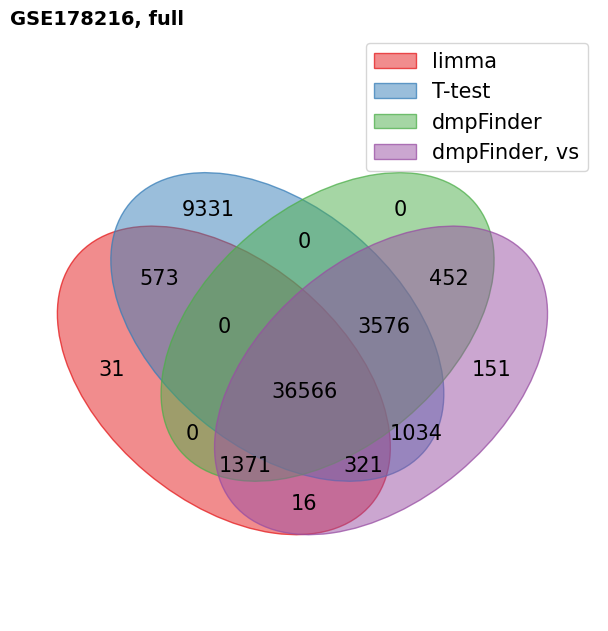

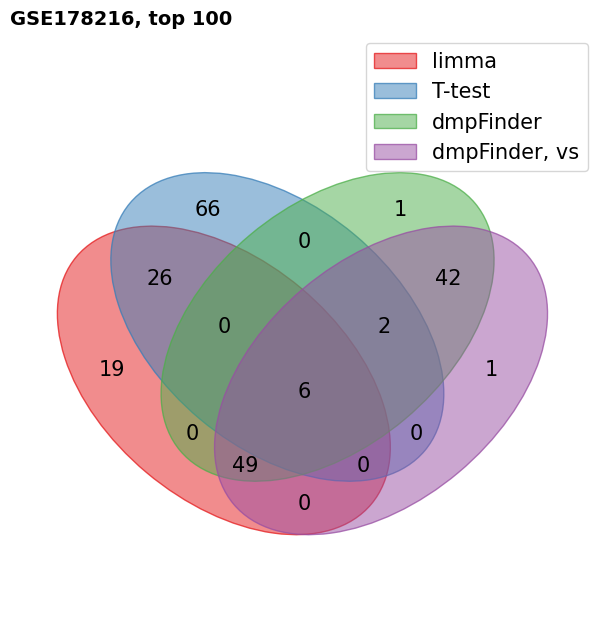

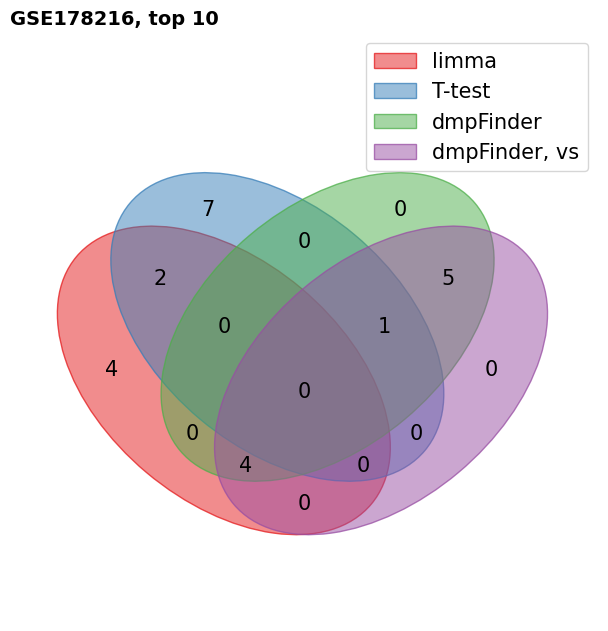

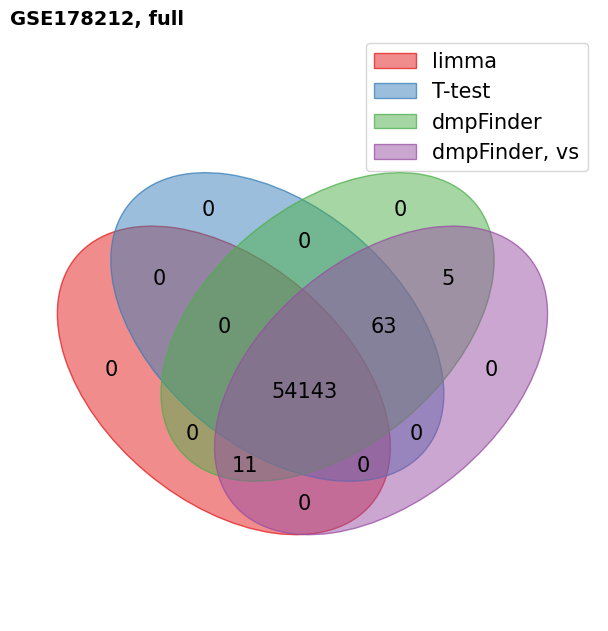

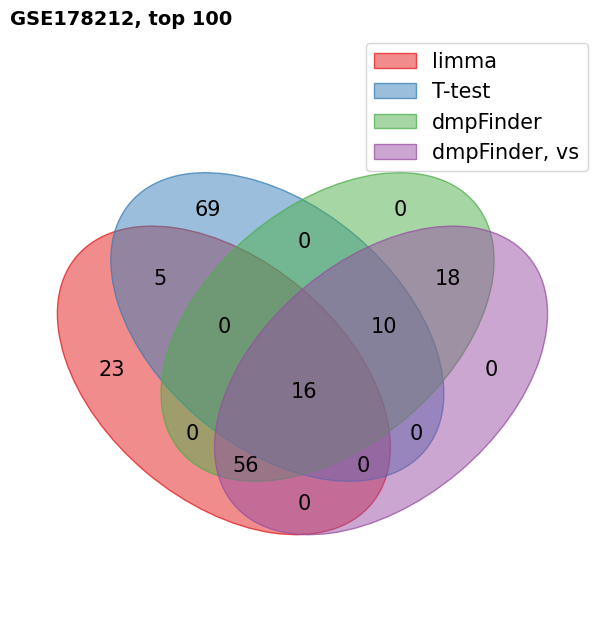

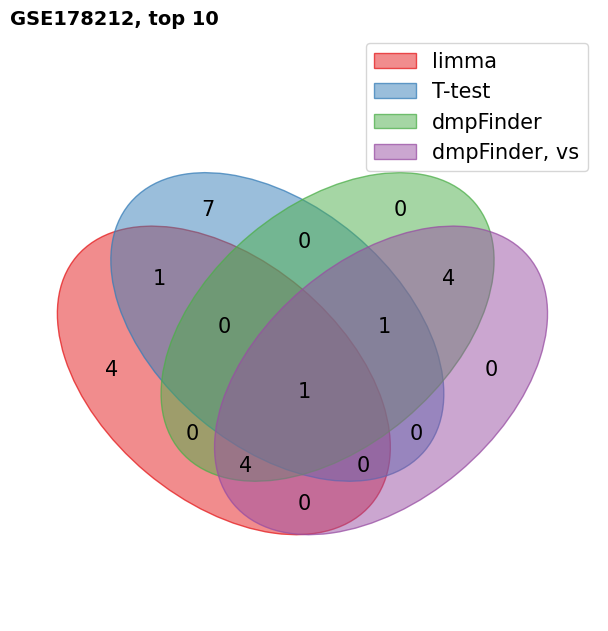

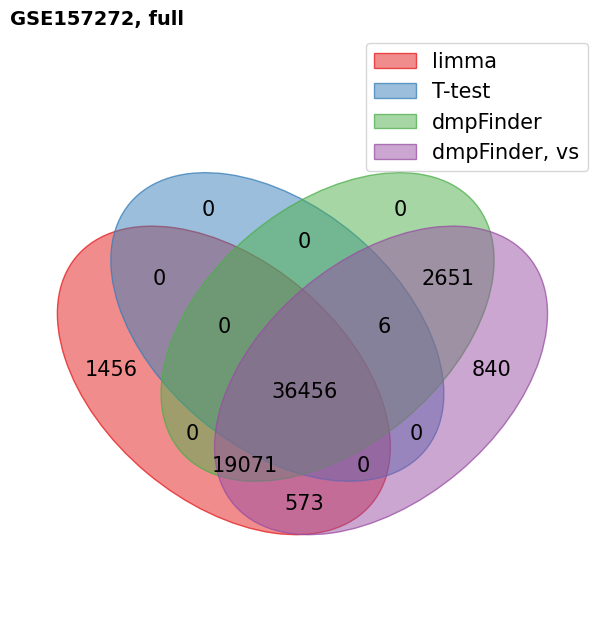

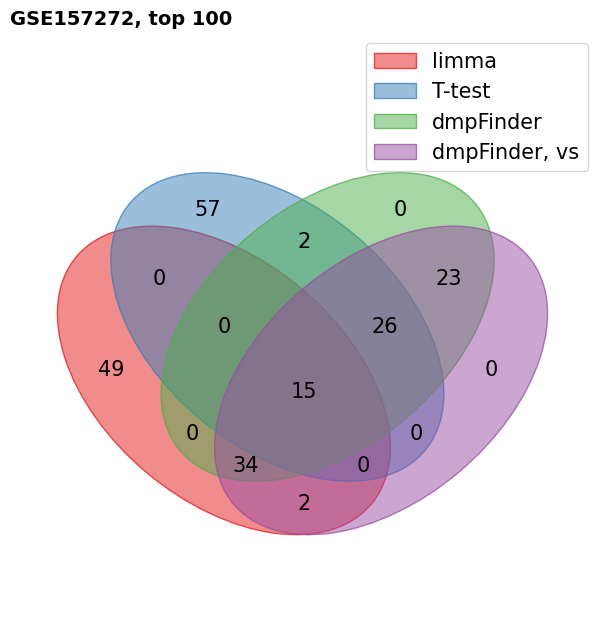

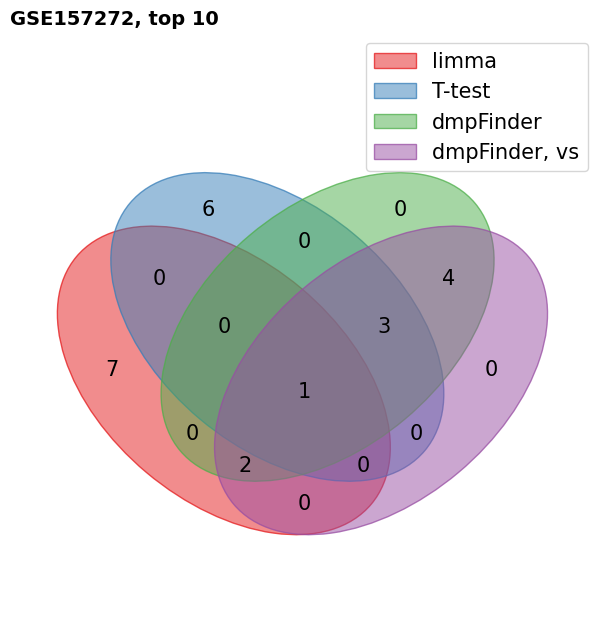

In [6]:
datasets = ['GSE210301_cortisol', 'GSE210301_relacorilant', 'GSE210301_cortisol_relacorilant', 'GSE175458', 'GSE156994', 'GSE175399','GSE157341', 'GSE210484', 'GSE101764', 'GSE196007', 'GSE85845','GSE156669', 'GSE178218', 'GSE178216', 'GSE178212', 'GSE157272_agressive']
dataset_names = {'GSE210301_cortisol' : 'GSE210301 (1)',
                   'GSE210301_relacorilant' : 'GSE210301 (2)',
                   'GSE210301_cortisol_relacorilant' : 'GSE210301 (3)',
                   'GSE175458' : 'GSE175458',
                   'GSE156994' : 'GSE156994',
                   'GSE175399' : 'GSE175399',
                   'GSE157341' : 'GSE157341',
                   'GSE210484' : 'GSE210484',
                   'GSE101764' : 'GSE101764',
                   'GSE196007' : 'GSE196007',
                   'GSE85845' : 'GSE85845',
                   'GSE156669' : 'GSE156669',
                   'GSE178218' : 'GSE178218',
                   'GSE178216' : 'GSE178216',
                   'GSE178212' : 'GSE178212',
                   'GSE157272_agressive' : 'GSE157272'}
for dataset in datasets:
    venn_dict = {}
    venn_dict_100 = {}
    venn_dict_10 = {}       
    limma = pd.read_csv(dataset + "_limma_cut", sep ='\t')
    if limma.shape[0] != 0:
        limma_index = list(limma.index)
        venn_dict['limma'] = set(limma_index)
        venn_dict_100['limma'] = set(limma_index[:100])
        venn_dict_10['limma'] = set(limma_index[:10])
        
    ttest = pd.read_csv(dataset + "_ttest_cut", sep ='\t')
    if ttest.shape[0] != 0:
        ttest_index = list(ttest.index)
        venn_dict['T-test'] = set(ttest_index)
        venn_dict_100['T-test'] = set(ttest_index[:100])
        venn_dict_10['T-test'] = set(ttest_index[:10])
        
    dmpfinder = pd.read_csv(dataset+"_dmpFinder_cut", sep ='\t')
    if dmpfinder.shape[0] != 0:
        dmpfinder_index = list(dmpfinder.index)
        venn_dict['dmpFinder'] = set(dmpfinder_index)
        venn_dict_100['dmpFinder'] = set(dmpfinder_index[:100])
        venn_dict_10['dmpFinder'] = set(dmpfinder_index[:10])
        
    dmpFinder_shrinkVar = pd.read_csv(dataset+"_dmpFinder_shrinkVar_cut", sep ='\t')
    if dmpFinder_shrinkVar.shape[0] != 0:
        dmpFinder_shrinkVar_index = list(dmpFinder_shrinkVar.index)
        venn_dict["dmpFinder, vs"] = set(dmpFinder_shrinkVar_index)
        venn_dict_100["dmpFinder, vs"] = set(dmpFinder_shrinkVar_index[:100])
        venn_dict_10["dmpFinder, vs"] = set(dmpFinder_shrinkVar_index[:10])    
    
    if len(venn_dict) < 2:
        continue
    if venn_dict:
        cmap_list = []
        for a in list(venn_dict.keys()):
            cmap_list.append(cmap.colors[methods.index(a)])
        cmap_current = ListedColormap(cmap_list)
        venn(venn_dict,
             figsize=cm2inch((19.4, 19.4)),
             fontsize=15,
             alpha=0.5,
             cmap = cmap_current)
        
        plt.savefig(f'without_titles//{dataset}_venn.png', pad_inches=0, bbox_inches='tight')
        plt.title(f'{dataset_names[dataset]}, full', fontweight="bold", loc = 'left', fontsize=14)
        plt.savefig(f'with_titles//{dataset}_venn.png', pad_inches=0, bbox_inches='tight')
        
    if venn_dict_100:
        cmap_list = []
        for a in list(venn_dict.keys()):
            cmap_list.append(cmap.colors[methods.index(a)])
        cmap_current = ListedColormap(cmap_list)
        venn(venn_dict_100,
             figsize=cm2inch((19.4, 19.4)),
             fontsize=15,
             alpha=0.5,
             cmap = cmap_current)
        
        plt.savefig(f'without_titles//{dataset}_venn_top100.png', pad_inches=0, bbox_inches='tight')
        plt.title(f'{dataset_names[dataset]}, top 100', fontweight="bold", loc = 'left', fontsize=14)
        plt.savefig(f'with_titles//{dataset}_venn_top100.png', pad_inches=0, bbox_inches='tight')
        
    if venn_dict_10:
        cmap_list = []
        for a in list(venn_dict.keys()):
            cmap_list.append(cmap.colors[methods.index(a)])
        cmap_current = ListedColormap(cmap_list)
        venn(venn_dict_10,
             figsize=cm2inch((19.4, 19.4)),
             fontsize=15,
             alpha=0.5,
             cmap = cmap_current)
        
        plt.savefig(f'without_titles//{dataset}_venn_top10.png', pad_inches=0, bbox_inches='tight')
        plt.title(f'{dataset_names[dataset]}, top 10', fontweight="bold", loc = 'left', fontsize=14)
        plt.savefig(f'with_titles//{dataset}_venn_top10.png', pad_inches=0, bbox_inches='tight')